# Module 2 Color Exercise

**For the exercises, we will create plots with correct and adequate color schemes similar to the lab and practice.** 

In [1]:
library(ggplot2)
library(RColorBrewer)


**Activity 1:** Display colormaps with 7 colors from RColorBrewer library for a **sequential** data type with **colorblind safe** colors.

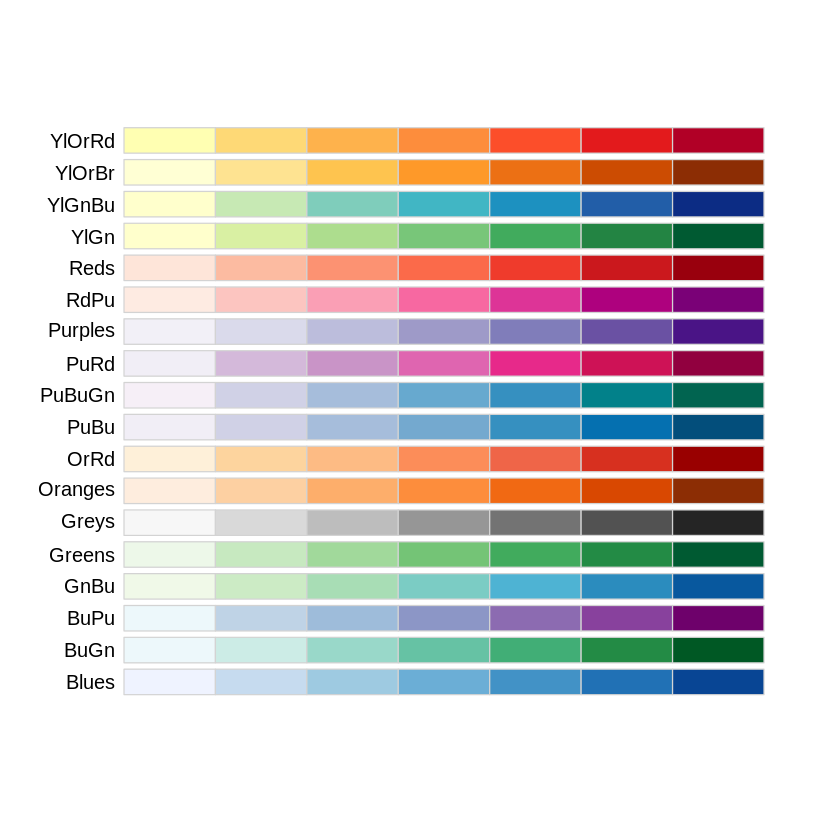

In [11]:
display.brewer.all(n=7, type='seq', colorblindFriendly=TRUE)

**Activity 2:** Create a **colorblind safe colormap with 100 colors** from the dichromat library, and display their hexadecimal codes.

In [13]:
library(dichromat)
p <- colorRampPalette(colorschemes$BluetoDarkOrange.12)(100)
p

[1] "#1F8F99" "#24949E" "#2A9AA4" "#30A0AA" "#35A6AF" "#3BACB5" "#41B2BB"
  [8] "#46B8C0" "#4CBEC6" "#52C4CC" "#59CAD1" "#61D0D7" "#69D6DD" "#71DCE2"
 [15] "#79E2E8" "#81E8EE" "#89EEF3" "#91F4F9" "#99FAFF" "#9BFAFF" "#9EFAFF"
 [22] "#A1FAFF" "#A4FAFF" "#A6FBFF" "#A9FBFF" "#ACFBFF" "#AFFBFF" "#B2FCFF"
 [29] "#B4FCFF" "#B7FCFF" "#BAFCFF" "#BDFCFF" "#C0FDFF" "#C3FDFF" "#C6FDFF"
 [36] "#C9FDFF" "#CCFEFF" "#CEFEFF" "#D1FEFF" "#D4FEFF" "#D7FEFF" "#DAFEFF"
 [43] "#DDFEFF" "#E0FEFF" "#E3FEFF" "#E6FFFF" "#E8FCF9" "#EBF9F3" "#EEF6EE"
 [50] "#F1F3E8" "#F3F1E2" "#F6EEDC" "#F9EBD7" "#FCE8D1" "#FFE5CB" "#FFE2C6"
 [57] "#FFDFC0" "#FFDCBA" "#FFD9B5" "#FFD6AF" "#FFD3A9" "#FFD0A4" "#FFCD9E"
 [64] "#FFC998" "#FFC693" "#FFC38D" "#FFC087" "#FFBD82" "#FFB97C" "#FFB676"
 [71] "#FFB371" "#FFB06B" "#FFAD66" "#FFA960" "#FFA65A" "#FFA354" "#FF9F4F"
 [78] "#FF9C49" "#FF9943" "#FF953E" "#FF9238" "#FF8F33" "#F9882D" "#F38227"
 [85] "#EE7C22" "#E8761C" "#E27016" "#DC6A10" "#D7640B" "#D15E05" "#CC5800"
 [92] "#C65500" "#C05200" "#BB5000" "#B54D00" "#AF4A00" "#AA4800" "#A44500"
 [99] "#9E4200" "#994000"

**Activity 3:** Use ellipse library to create an elliptical correlation plot for the diamonds data using carat, price, table, and depth variables. Make sure to use a **colorblind safe, diverging** color scheme. 

In [4]:
library(ellipse)
head(diamonds)
data=diamonds[,c("carat","depth","price","table")]


Attaching package: ‘ellipse’

The following object is masked from ‘package:graphics’:

    pairs



carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


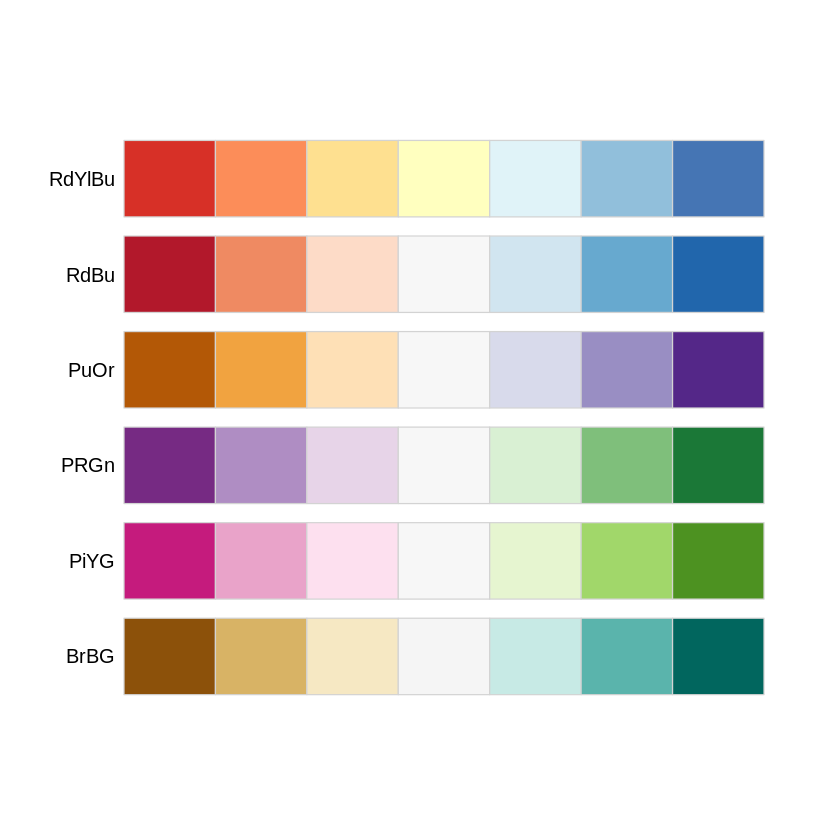

In [5]:
# we can pick from the following or the dichromat library
display.brewer.all(n=7, type='div', colorblindFriendly=TRUE)

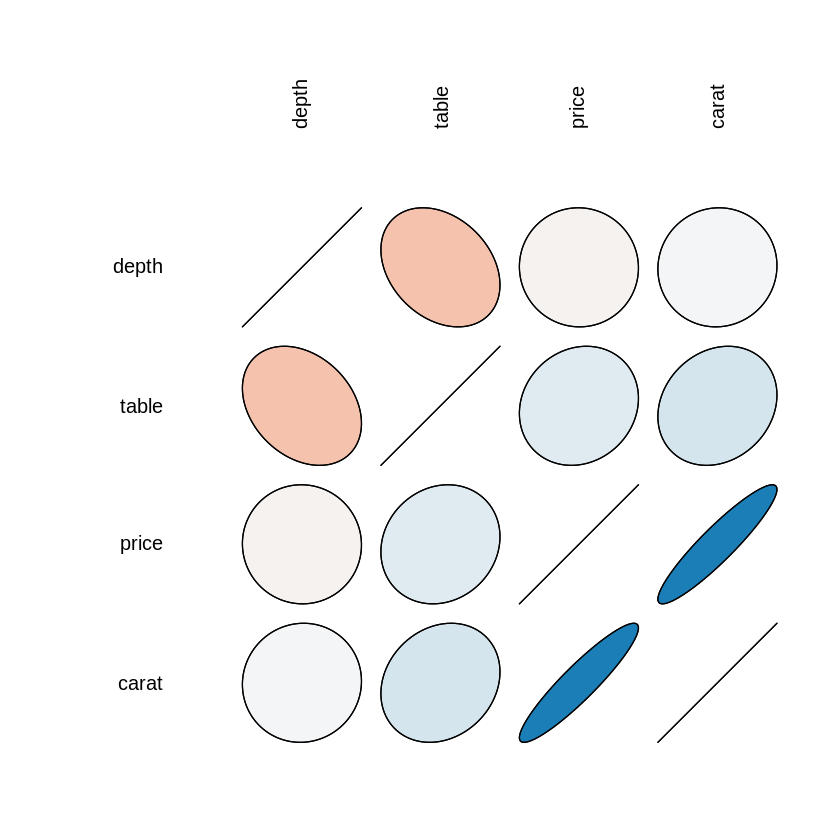

In [6]:
corr= cor(data)
# Build a palette of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "RdBu") # chosen from above
my_colors=colorRampPalette(my_colors)(100)
 
# Order the correlation matrix
ord <- order(corr[1, ])
data_ord = corr[ord, ord]
# plot and pick a color from the palette based on the value of correlation [-1,1] --> [0,100]
plotcorr(data_ord, col=my_colors[data_ord*50+50], mar=c(1,1,1,1))

**Activity 4:** Create a scatter plot using **all** diamonds data for carat vs. price and encode clarity variable with a **sequential** color scheme. 

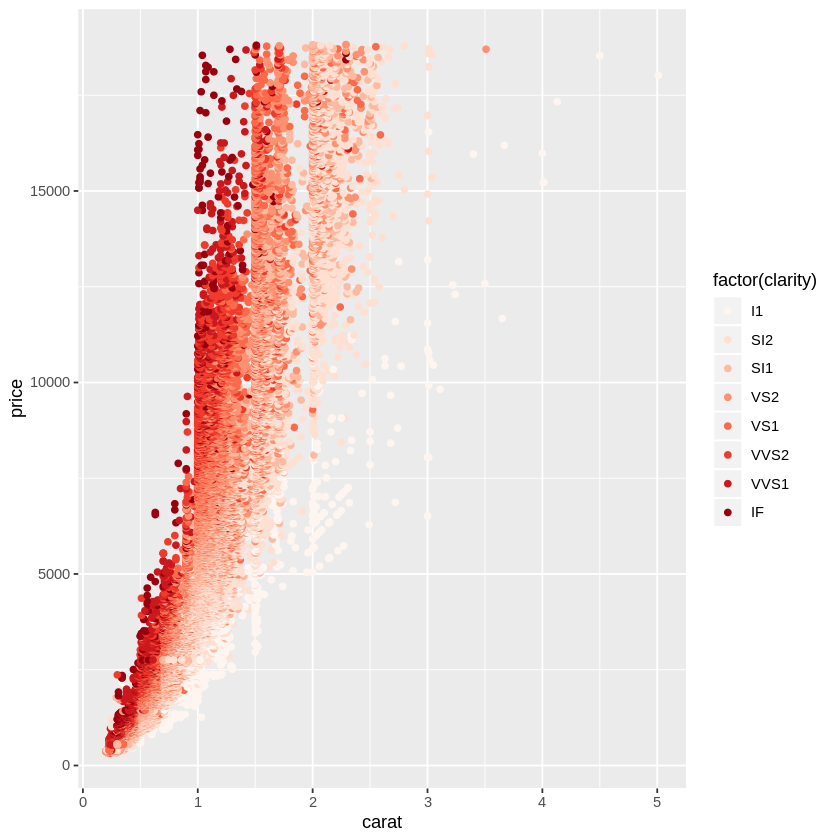

In [7]:
(gp <- ggplot(diamonds, aes(x=carat, y=price, color=factor(clarity))) + geom_point()) + scale_color_brewer(palette="Reds")

**Activity 5:** Repeat Activity 4 with **alpha transparency**. **Is this a better idea? Discuss your answer.**

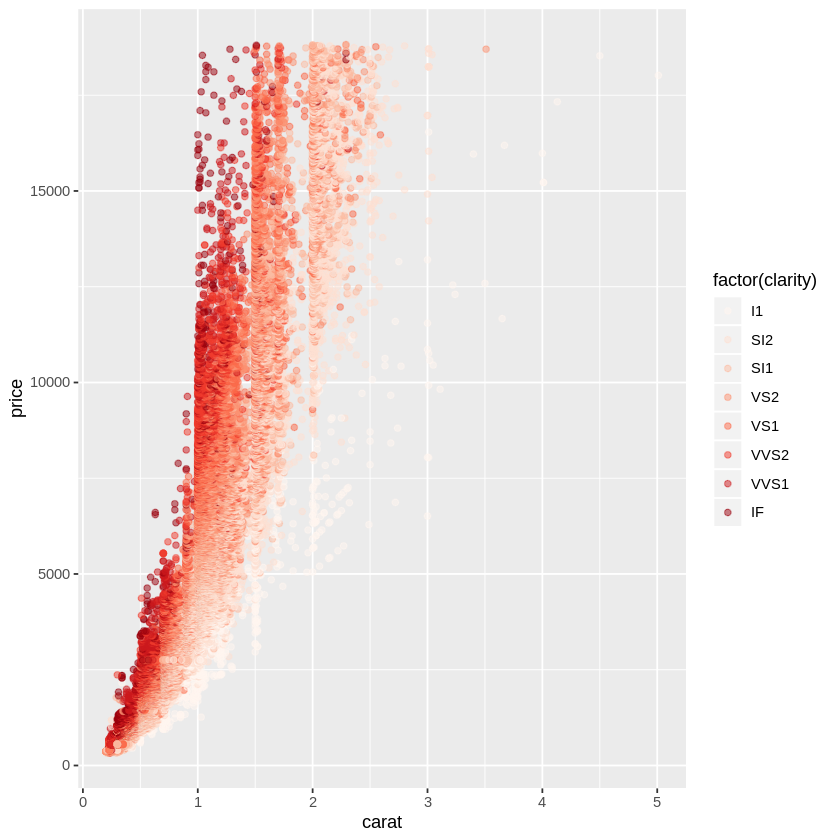

In [8]:
(gp2 <- ggplot(diamonds, aes(x=carat, y=price, color=factor(clarity))) + geom_point(alpha=0.5)) + scale_color_brewer(palette="Reds")

**Activity 6:** Recreate the following plot using `ggplot2` functions and the **mtcars** data set. Hint: you may have to change attribute characteristics, also look at theme functions in `ggplot2`. 

<img src="ex.png">

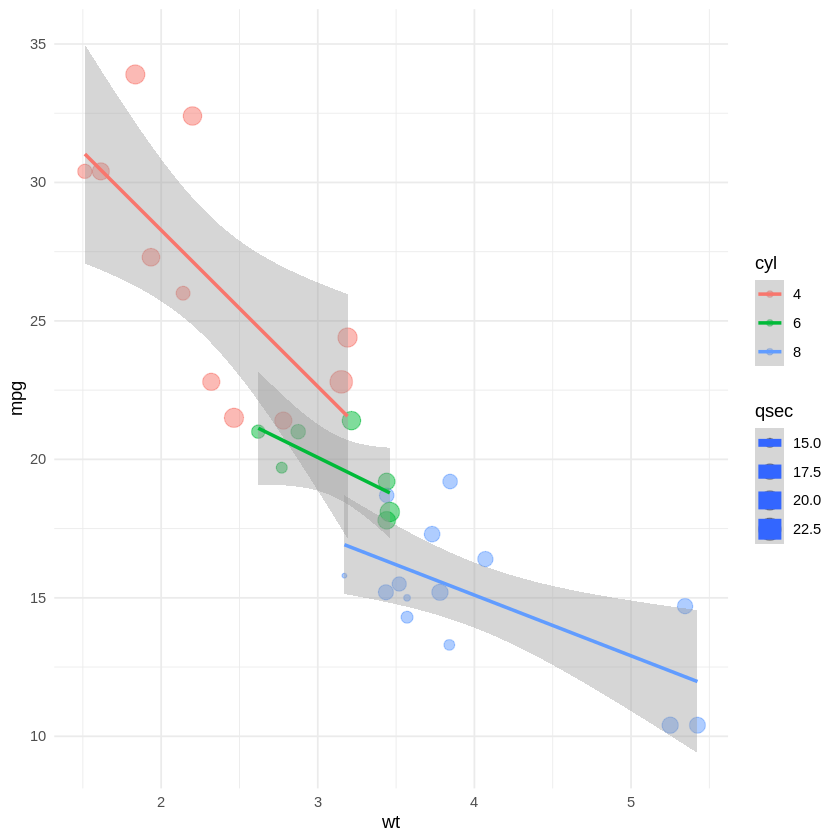

In [9]:
df <- mtcars
df$cyl <- as.factor(df$cyl) # cyl should be a factor so that ggplot does not use sequential color palette to represent it. 
ggplot(data = df, mapping = aes(x = wt, y = mpg, size = qsec, color=cyl)) + geom_point(alpha=0.5) + 
stat_smooth(method = 'lm') + theme_minimal()